In [57]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [58]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [59]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [60]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [61]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables 
Base.prepare(autoload_with=engine)

In [62]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [63]:
# Save references to each table to the classes named station and measurement.
measurement = Base.classes.measurement
station = Base.classes.station

In [64]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [65]:
first_measurement = session.query(measurement).first()
first_measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1595bdf70>,
 'id': 1,
 'station': 'USC00519397',
 'prcp': 0.08,
 'date': '2010-01-01',
 'tobs': 65.0}

In [66]:
first_station = session.query(station).first()
first_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1595757f0>,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0}

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

In [67]:
# Find the latest measurement date. # Starting from the most recent data point in the database. 
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [68]:
# Find the earliest measurement date
first_date = session.query(measurement.date).order_by(measurement.date).first()
print(first_date)

('2010-01-01',)


In [69]:
# Calculate the date one year from the last date in data set.
last_date  = dt.datetime.strptime(last_date [0], '%Y-%m-%d')
start_date = last_date  - dt.timedelta(days=365)
print(start_date)

2016-08-23 00:00:00


In [70]:
#convert start date to a string
start_date_str = start_date.strftime("%Y-%m-%d")

In [71]:
# Perform a query to retrieve the data and precipitation scores
sel = [measurement.date, func.sum(measurement.prcp)]
precip = session.query(*sel).\
    filter(measurement.date >= start_date_str).\
    group_by(measurement.date).\
    order_by(measurement.date.desc()).all()
precip

[('2017-08-23', 0.53),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.5800000000000001),
 ('2017-08-20', 0.01),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.06),
 ('2017-08-17', 0.19),
 ('2017-08-16', 0.61),
 ('2017-08-15', 0.82),
 ('2017-08-14', 0.31),
 ('2017-08-13', 0.0),
 ('2017-08-12', 0.14),
 ('2017-08-11', 0.0),
 ('2017-08-10', 0.07),
 ('2017-08-09', 0.15),
 ('2017-08-08', 0.44000000000000006),
 ('2017-08-07', 0.05),
 ('2017-08-06', 0.0),
 ('2017-08-05', 0.06),
 ('2017-08-04', 0.06),
 ('2017-08-03', 0.06999999999999999),
 ('2017-08-02', 0.3),
 ('2017-08-01', 0.13999999999999999),
 ('2017-07-31', 0.0),
 ('2017-07-30', 0.3),
 ('2017-07-29', 0.61),
 ('2017-07-28', 0.77),
 ('2017-07-27', 0.01),
 ('2017-07-26', 0.5),
 ('2017-07-25', 0.61),
 ('2017-07-24', 3.27),
 ('2017-07-23', 1.1300000000000001),
 ('2017-07-22', 4.42),
 ('2017-07-21', 0.13),
 ('2017-07-20', 1.24),
 ('2017-07-19', 0.41000000000000003),
 ('2017-07-18', 2.53),
 ('2017-07-17', 0.91),
 ('2017-07-16', 0.81),
 ('2017-07-15', 0.19),


In [81]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(precip, columns=['Date', 'precipitation'])

In [73]:
df.head()

,Date,precipitation
0,2017-08-23,0.53
1,2017-08-22,0.50
2,2017-08-21,0.58
3,2017-08-20,0.01
4,2017-08-19,0.09


In [47]:
df2 = df[df['precipitation'] != 0]

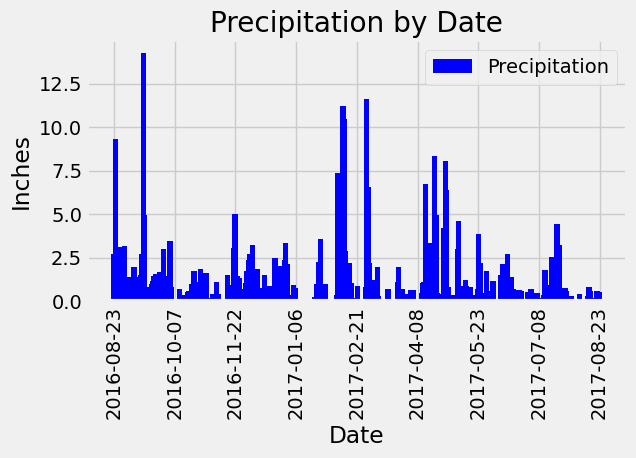

In [48]:
# Sort the dataframe by date
df2 = df2.sort_values('Date')

# Convert 'Date' column to datetime
df2['Date'] = pd.to_datetime(df2['Date'])

# Plot the data
fig, ax = plt.subplots()
ax.bar(df2['Date'], df2['precipitation'],  width=4, color='blue', label='Precipitation')

# Set x-axis to show dates starting from the first date
ax.set_xticks(pd.date_range(start=df2['Date'].min(), end=df2['Date'].max(), periods=9))

# ax.set_xticks(pd.date_range(start=df['Date'].min(), end=df['Date'].max(), periods=9))

# Rotate date labels for better readability
plt.xticks(rotation=90)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Inches')
ax.set_title('Precipitation by Date')

# Add a legend
ax.legend()

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()

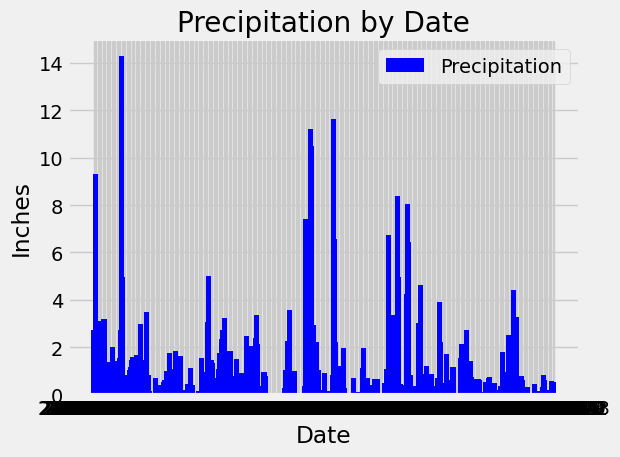

In [82]:
# Sort the dataframe by date
df = df.sort_values('Date')

# Convert 'Date' column to datetime

# Plot the data
fig, ax = plt.subplots()
plt.bar(df['Date'], df['precipitation'],  width=4, color='blue', label='Precipitation')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation by Date')

# Add a legend
plt.legend()

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()

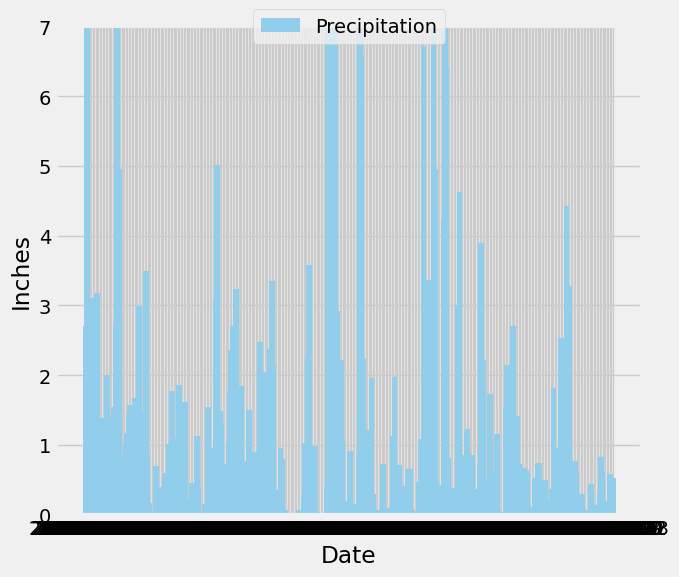

In [76]:
# Sort the dataframe by date
df = df.sort_values('Date')

# Plotting the data
plt.figure(figsize=(7, 6))
plt.bar(df['Date'], df['precipitation'], width=4, color='#90CEEB', align='center')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Inches')
plt.ylim(0, 7) 
# specific_dates = ['2016-08-23', '2016-10-01','2016-11-09','2016-12-19', '2017-01-28','2017-03-09', '2017-04-18', '2017-05-31', '2017-07-10']
# specific_dates = pd.to_datetime(specific_dates)
# plt.xticks(specific_dates, rotation=90)
plt.legend(['Precipitation'], loc='center', bbox_to_anchor=(0.5, 1))
plt.tight_layout()

# Show the plot
plt.show()

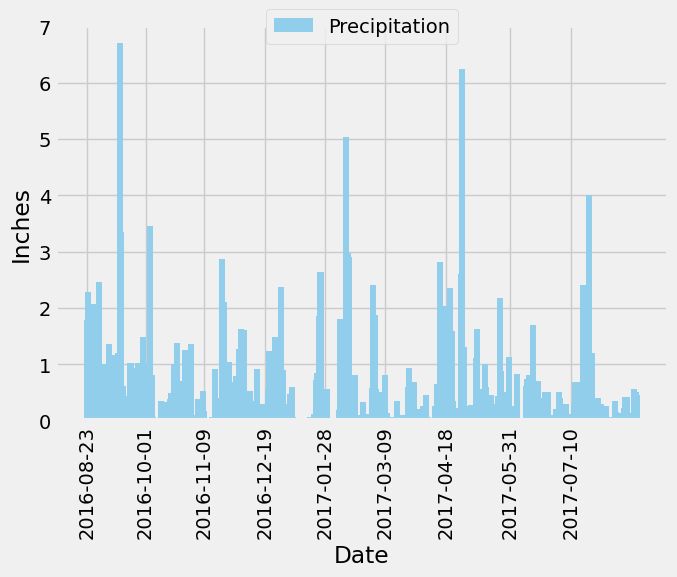

In [172]:
# Sort the dataframe by date
df = df.sort_values('Date')

# Plotting the data
plt.figure(figsize=(7, 6))
plt.bar(df['Date'], df['precipitation'], width=4, color='#90CEEB', align='center')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Inches')
plt.ylim(0, 7) 
specific_dates = ['2016-08-23', '2016-10-01','2016-11-09','2016-12-19', '2017-01-28','2017-03-09', '2017-04-18', '2017-05-31', '2017-07-10']
specific_dates = pd.to_datetime(specific_dates)
plt.xticks(specific_dates, rotation=90)
plt.legend(['Precipitation'], loc='center', bbox_to_anchor=(0.5, 1))
plt.tight_layout()

# Show the plot
plt.show()

In [83]:
summary_statistics = df['precipitation'].describe()

summary_df = summary_statistics.to_frame().reset_index()
summary_df.columns = ["stats", 'precipitation']

# Remove the index for display purposes
summary_df = summary_df.reset_index(drop=True)

# Display the DataFrame
summary_df

,stats,precipitation
0,count,366.000000
1,mean,0.978907
2,std,1.776349
3,min,0.000000
4,25%,0.052500
5,50%,0.405000
6,75%,1.087500
7,max,14.280000


In [173]:
summary_statistics = df['precipitation'].describe()

summary_df = summary_statistics.to_frame().reset_index()
summary_df.columns = ["stats", 'precipitation']

# Remove the index for display purposes
summary_df = summary_df.reset_index(drop=True)

# Display the DataFrame
summary_df

,stats,precipitation
0,count,2021.000000
1,mean,0.177279
2,std,0.461190
3,min,0.000000
4,25%,0.000000
5,50%,0.020000
6,75%,0.130000
7,max,6.700000


In [174]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_df.set_index('stats', inplace=True)

# Remove the index name
summary_df.index.name = None

# Display the modified DataFrame
summary_df


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [176]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(func.distinct(measurement.station))).all()


[(9,)]

In [177]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sel = [measurement.station, func.count(measurement.station).label('count')]

# Query to find the most active stations
most_active_stations = session.query(*sel).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()

most_active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [178]:
# Print the result
for station, count in most_active_stations:
    print(f"Station: {station}, Count: {count}")

Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [179]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(measurement.tobs),
       func.max(measurement.tobs),
       func.avg(measurement.tobs)]
most_active = session.query(*sel).\
    filter(measurement.station == 'USC00519281').all()
most_active

[(54.0, 85.0, 71.66378066378067)]

In [189]:
query_result = session.query(
    func.min(measurement.tobs),
    func.avg(measurement.tobs),
    func.max(measurement.tobs)
).filter(measurement.date >= start_date).all()

min_temp, avg_temp, max_temp = query_result[0]

    # Create a dictionary with the results
temp_stats = {
    "min": min_temp,
    "avg": avg_temp,
    "max": max_temp
    }



In [190]:
temp_stats

{'min': 58.0, 'avg': 74.57894736842105, 'max': 87.0}

In [180]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel = [measurement.date,measurement.tobs]
temp = session.query(*sel).\
    filter(measurement.date >= start_date_str).\
    filter(measurement.station == 'USC00519281').all()
temp

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [181]:
station_temps_df = pd.DataFrame(temp, columns=['Measurement Date', 'Temperature'])
station_temps_df.head()

,Measurement Date,Temperature
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


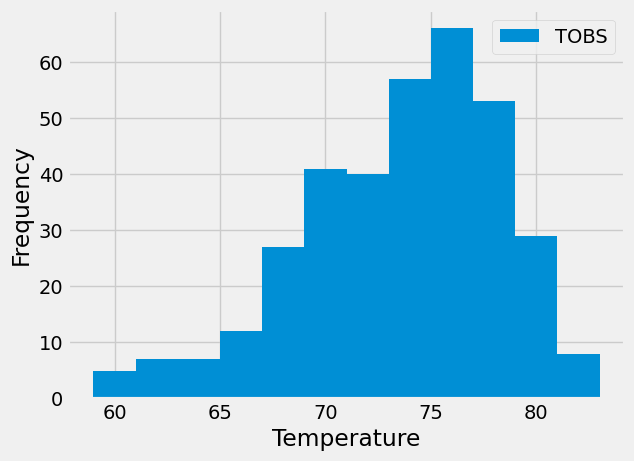

In [182]:
plt.hist(station_temps_df['Temperature'],bins=12, density=False, label="TOBS")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend()
plt.figsize=(10,7)
plt.savefig('Annual_Temps_USC00519281.png',bbox_inches='tight')
plt.show()

# Close Session

In [16]:
# Close Session
session.close()